In [1]:
#pip install scikit-learn wordcloud matplotlib
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
#from wordcloud import WordCloud
import requests

API_BASE = "http://localhost:8000"

In [23]:
session_id_list = ['c7c11edf-4851-4040-824b-4c34dc6e8318', '3e9870dd-e53a-41bc-a687-2f616ea027c2']

In [24]:
def analyze_session_differences(session_id_list):
    session_info = []
    for session_id in session_id_list:
        response = requests.get(f"{API_BASE}/session/{session_id}")
        if response.status_code != 200:
            print("Skipping %s" % session_id)
        else:
            session_json = response.json()
            session_info[session_id] = session_json
    return(session_info)

In [25]:
session_info = analyze_session_differences(session_id_list)

In [38]:
def create_invidiual_documents():
    goal_documents  = []
    turns_documents = []
    for session_id, session_dict in session_info.items():
        goal_documents.append(session_dict['session_data']['good_faith'][0]['goal'])
        turn_dat = session_dict['session_data']['good_faith'][0]['turns']
        my_str = "\n".join([f"{x['role']} : {x['content']}" for x in turn_dat])
        turns_info.append(my_str)
    return(goal_documents, turn_documents)

In [39]:
def generate_visualization_per_doc_set(documnets):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(documents)
    feature_names = vectorizer.get_feature_names_out()


    def generate_wordcloud_for_document(doc_index):
        # Get the TF-IDF vector for this document
        tfidf_vector = tfidf_matrix[doc_index]
        word_scores = {
            feature_names[i]: tfidf_vector[0, i]
            for i in tfidf_vector.nonzero()[1]
        }
    
        # Generate word cloud from TF-IDF scores
        wordcloud = WordCloud(width=800, height=400, background_color='white')
        wordcloud.generate_from_frequencies(word_scores)
        return(wordcloud)

    wordcloud_res = []
    for i in range(len(documents)):
        wordcloud_res.append(generate_wordcloud_for_document(i))
    return(wordcloud_res)

    


In [41]:
goal_visualize = generate_visualization_per_doc_set(goal_documents)
convo_visualize = generate_visualization_per_doc_set(turns_documents)

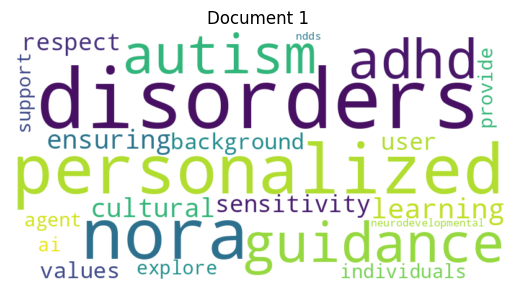

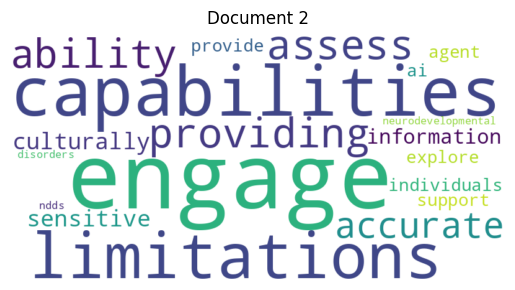

In [45]:
for i, wc in enumerate(goal_visualize):
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Document {i + 1}")
    plt.show()


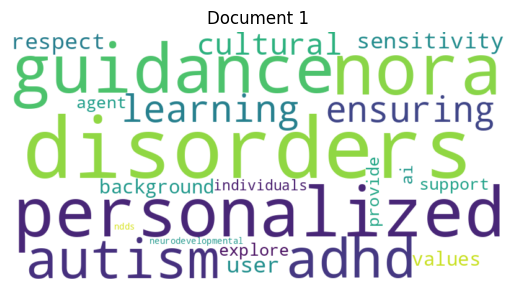

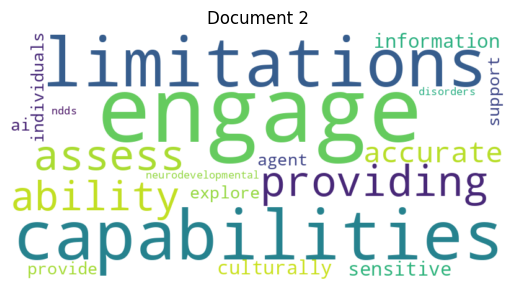

In [46]:
for i, wc in enumerate(convo_visualize):
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Document {i + 1}")
    plt.show()
